In [21]:
%pwd
%cd mmsegmentation


[WinError 2] The system cannot find the file specified: 'mmsegmentation'
c:\Users\spet4299\Documents\DPhil\Research\TEE_Generation\evaluation\delta_metric\mmsegmentation


In [22]:
!pip install openmim
!mim install mmcv-full

Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html


In [23]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation

import mmseg
print(mmseg.__version__)

1.13.1 True
0.30.0


In [24]:
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints

--2023-02-23 16:26:12--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.57.213, 163.181.57.210, 163.181.57.212, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.57.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/octet-stream]
Saving to: 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

     0K .......... .......... .......... .......... ..........  0% 10.2M 18s
    50K .......... .......... .......... .......... ..........  0% 15.6M 15s
   100K .......... .......... .......... .......... ..........  0%  226M 10s
   150K .......... .......... .......... .......... ..........  0% 76.3M 8s
   200K .......... .......... .......... .......... ..........  0% 17.3M 9s
   250K .......... .........

In [25]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

config_file = 'configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'
checkpoint_file = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

In [26]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


In [27]:
# test a single image
img = 'demo/demo.png'
result = inference_segmentor(model, img)

c:\Users\spet4299\Documents\DPhil\Research\TEE_Generation\evaluation\delta_metric\mmsegmentation\mmseg\models\segmentors\base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


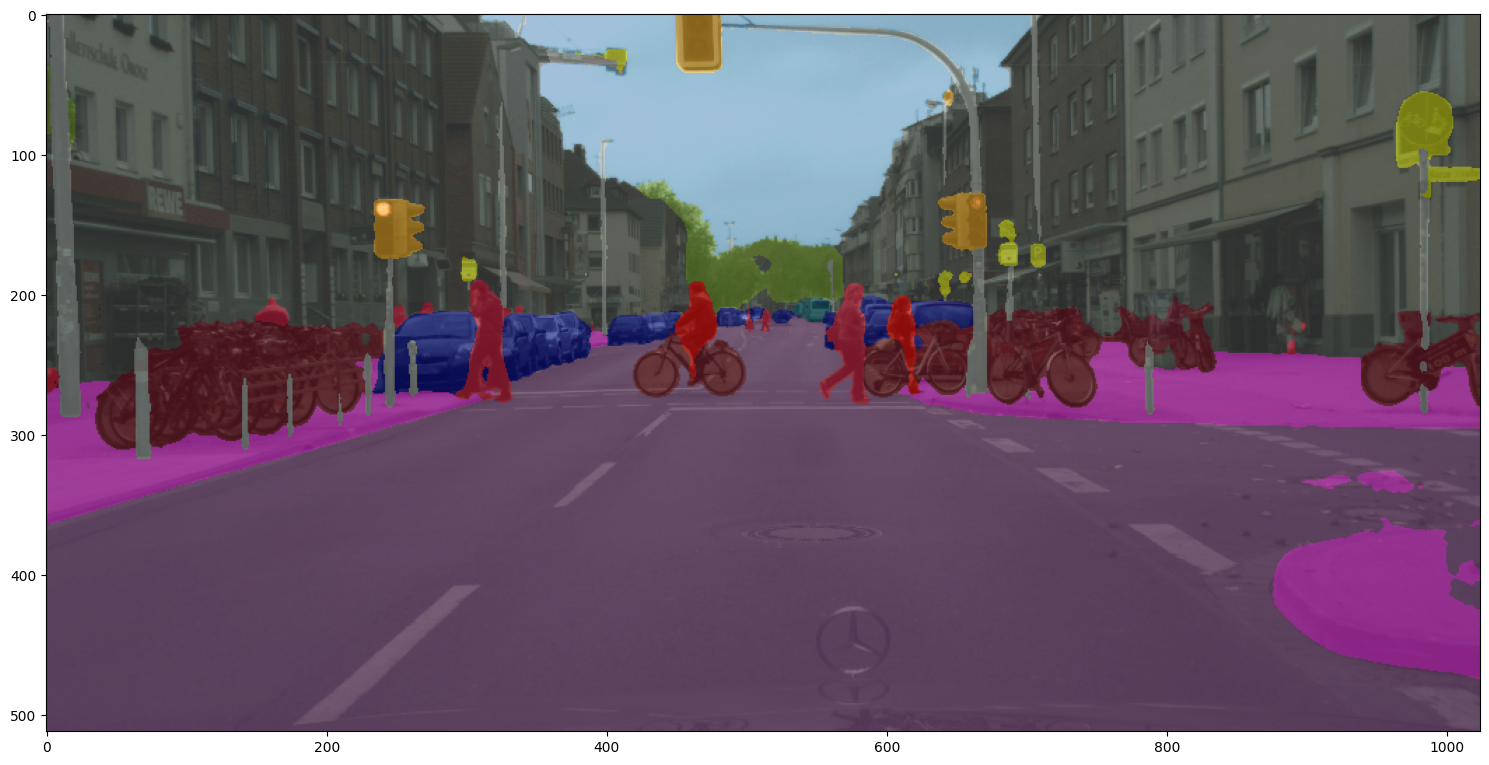

In [28]:
# show the results
show_result_pyplot(model, img, result, get_palette('cityscapes'))